In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'../../results/computed-trajectories-Oct2021toSep2022.csv', delimiter=',', skiprows=0, low_memory=False)
df2 = pd.read_csv(r'../../data/tidy/vehicles-summary.csv', delimiter=',', skiprows=0, low_memory=False)

In [4]:
### Map powertrain
mydict = df2.groupby('Type')['Equipment ID'].agg(list).to_dict()
d = {val:key for key, lst in mydict.items() for val in lst}
df['Powertrain'] = df['Vehicle'].map(d)


### Map vehicle models
mydict = df2.groupby('Model')['Equipment ID'].agg(list).to_dict()
d = {val:key for key, lst in mydict.items() for val in lst}
df['VehicleModel'] = df['Vehicle'].map(d)

In [5]:
df_validation= pd.read_csv(r'../../data/tidy/fuel-tickets-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [11]:
### Map powertrain
mydict = df2.groupby('Type')['Equipment ID'].agg(list).to_dict()
d = {val:key for key, lst in mydict.items() for val in lst}
df_validation['Powertrain'] = df_validation['Equipment ID'].map(d)


### Map vehicle models
mydict = df2.groupby('Model')['Equipment ID'].agg(list).to_dict()
d = {val:key for key, lst in mydict.items() for val in lst}
df_validation['VehicleModel'] = df_validation['Equipment ID'].map(d)

In [12]:
df_validation

,Unnamed: 0,Equipment ID,Qty,Transaction Date,Meter1Reading,Fuel Orfluid Type,Powertrain,VehicleModel
0,0,7610,27.40,2021-10-01 20:02:00,498070,DIE,conventional,Gillig 40
1,1,7610,56.20,2021-10-09 13:59:00,498369,DIE,conventional,Gillig 40
2,2,7610,2.50,2021-10-12 20:02:00,498591,DIE,conventional,Gillig 40
3,3,7610,40.10,2021-10-12 20:05:00,498591,DIE,conventional,Gillig 40
4,4,7610,12.60,2021-10-13 16:09:00,498655,DIE,conventional,Gillig 40
...,...,...,...,...,...,...,...,...
28346,28346,1864,4.81,2022-09-23 15:37:00,21762,DIE,conventional,NEW FLYER XD40
28347,28347,1864,9.01,2022-09-26 15:58:00,21810,DIE,conventional,NEW FLYER XD40
28348,28348,1864,32.73,2022-09-27 22:20:00,21976,DIE,conventional,NEW FLYER XD40
28349,28349,1864,40.55,2022-09-28 21:48:00,22140,DIE,conventional,NEW FLYER XD40


<Figure size 4500x1500 with 0 Axes>

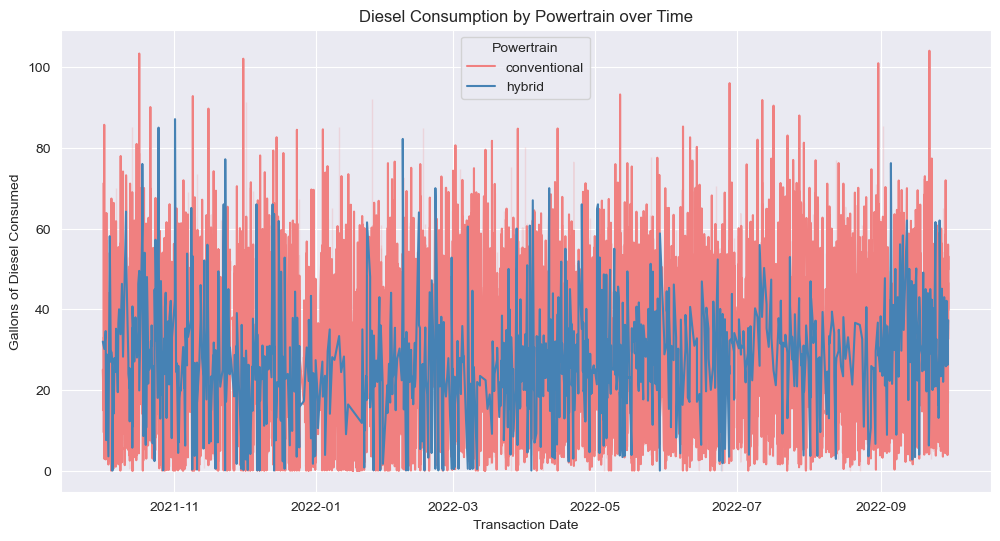

In [31]:
# Plot timeseries of energy consumption
plt.figure(figsize=(15,5), dpi=300)
# Convert 'Transaction Date' column to datetime format
df_validation['Transaction Date'] = pd.to_datetime(df_validation['Transaction Date'])

# Filter out negative Qty values and electric powertrain
df_validation = df_validation.loc[df_validation['Qty'] >= 0]
df_validation = df_validation.loc[df_validation['Powertrain'] != 'electric']

# Define custom color palette
colors = {'conventional': 'lightcoral', 'hybrid': 'steelblue'}
custom_palette = sns.color_palette([colors[p] for p in df_validation['Powertrain'].unique()])

# Set the custom color palette
sns.set_palette(custom_palette)

# Plot the timeseries of energy consumption with custom colors
plt.figure(figsize=(12,6))
sns.lineplot(x='Transaction Date', y='Qty', hue='Powertrain', data=df_validation)
plt.title('Diesel Consumption by Powertrain over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Gallons of Diesel Consumed')
plt.savefig(r'../../figures/validation-timeseries-oct2021-sep2022.png', dpi=600, bbox_inches='tight')
plt.show()


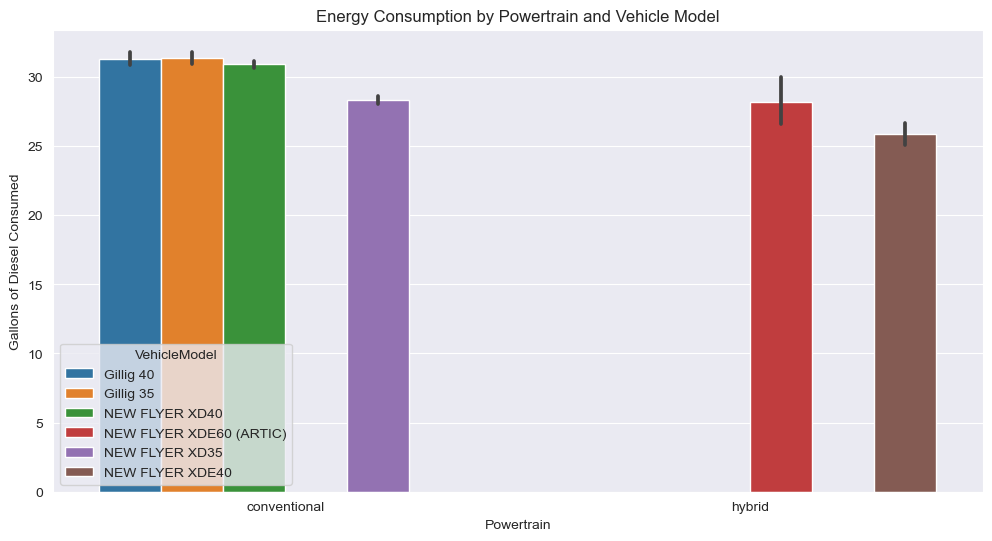

In [22]:
#Plot energy consumption by Powertrain and Vehicle Model

# Convert 'Qty' column to numeric data type
df_validation['Qty'] = pd.to_numeric(df_validation['Qty'])

plt.figure(figsize=(12,6))
sns.barplot(x='Powertrain', y='Qty', hue='VehicleModel', data=df_validation)
plt.title('Energy Consumption by Powertrain and Vehicle Model')
plt.xlabel('Powertrain')
plt.ylabel('Gallons of Diesel Consumed')
plt.show()


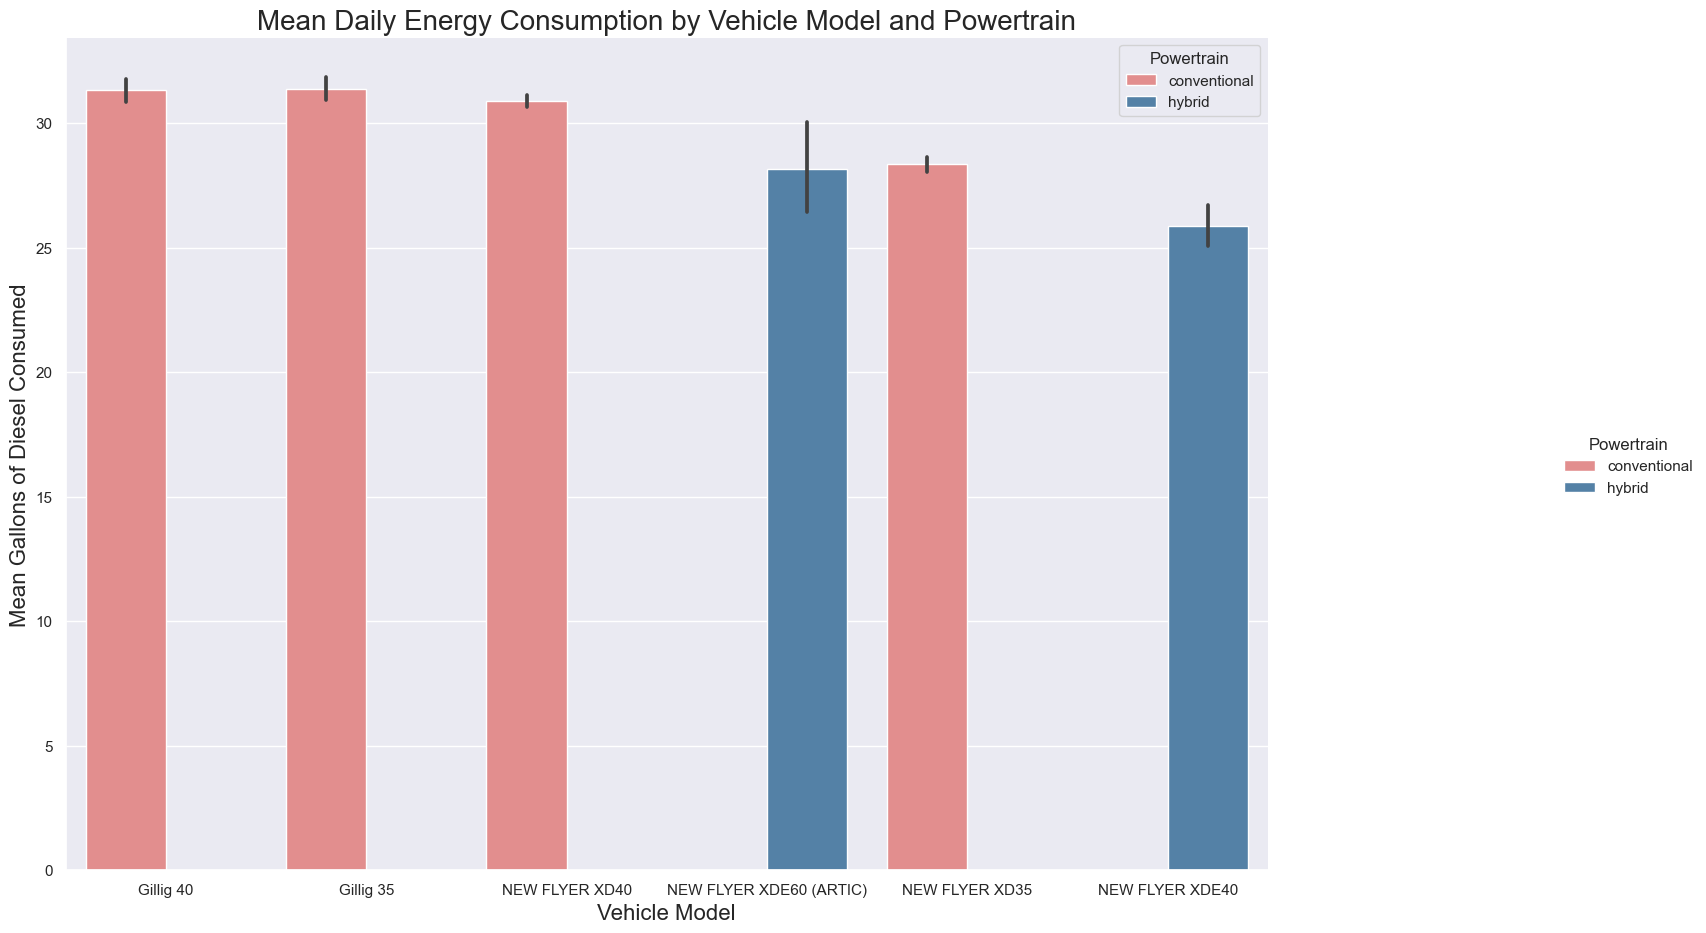

In [48]:
# Convert 'Qty' column to numeric data type
df_validation['Qty'] = pd.to_numeric(df_validation['Qty'])
df_validation['Transaction Date'] = pd.to_datetime(df_validation['Transaction Date'])

# Convert 'Qty' column to numeric data type
df_validation['Qty'] = pd.to_numeric(df_validation['Qty'])
df_validation['Transaction Date'] = pd.to_datetime(df_validation['Transaction Date'])

# Define custom color palette
colors = {'conventional': 'lightcoral', 'hybrid': 'steelblue'}
custom_palette = sns.color_palette([colors[p] for p in df_validation['Powertrain'].unique()])

# Plot the bar chart with custom colors and increased dpi
# Set figure size and font size
p=sns.catplot(x='VehicleModel', y='Qty', hue='Powertrain', kind='bar', estimator='mean', data=df_validation, palette=custom_palette)
p.fig.set_size_inches(19,10)
plt.title('Mean Daily Energy Consumption by Vehicle Model and Powertrain', size=20)
plt.xlabel('Vehicle Model', size=16)
plt.ylabel('Mean Gallons of Diesel Consumed', size=16)
plt.legend(title='Powertrain')
plt.savefig(r'../../figures/validation-barplot-oct2021-sep2022.png', dpi=400, bbox_inches='tight')
plt.show()


In [49]:
df_validation['Qty'].mean()

30.410038017358872

In [50]:
conventional_mean = df_validation.loc[df_validation['Powertrain'] == 'conventional', 'Qty'].mean()
hybrid_mean = df_validation.loc[df_validation['Powertrain'] == 'hybrid', 'Qty'].mean()

print('Mean of Qty for conventional powertrain:', conventional_mean)
print('Mean of Qty for hybrid powertrain:', hybrid_mean)

Mean of Qty for conventional powertrain: 30.573891653260507
Mean of Qty for hybrid powertrain: 26.61156114483955
